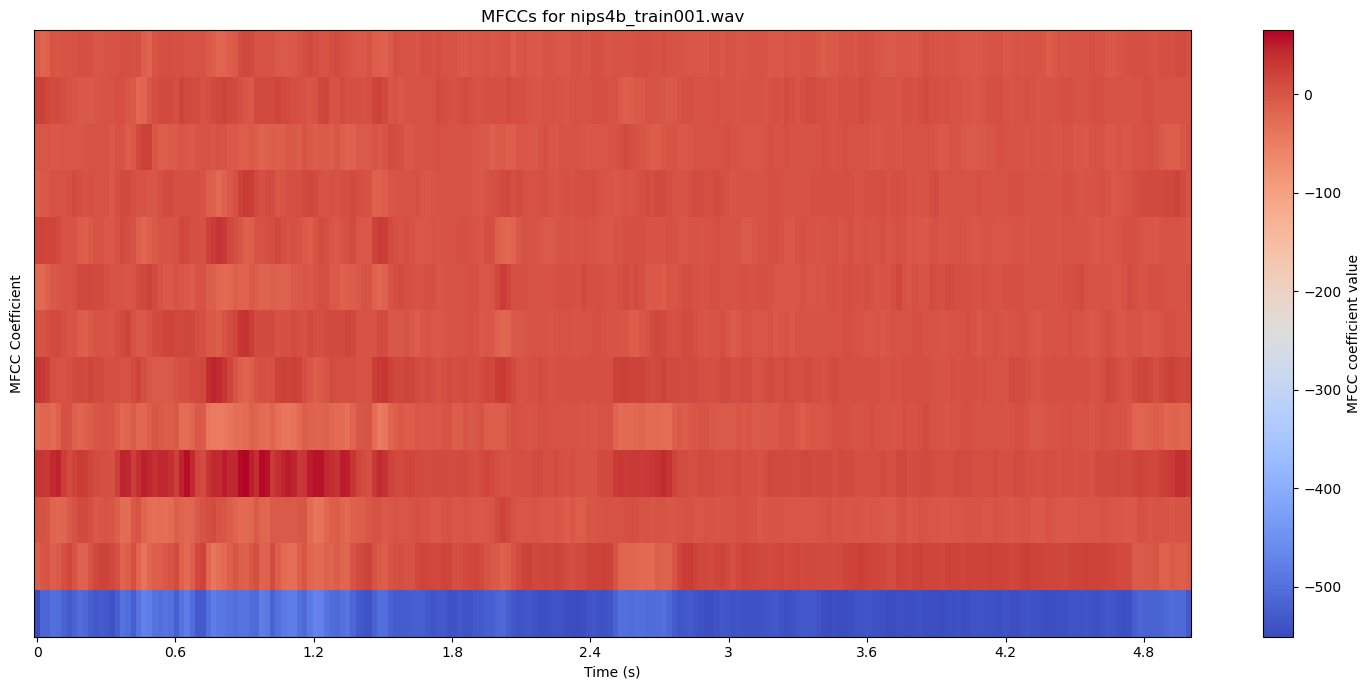

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


# Paths to the audio files
train_audio_path = "data/train/nips4b_train001.wav"
test_audio_path = "data/test/nips4b_test001.wav"

# Load the audio file
y, sr = librosa.load(train_audio_path)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualize the MFCCs
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC coefficient value")
plt.ylabel("MFCC Coefficient")
plt.xlabel("Time (s)")
plt.title("MFCCs for nips4b_train001.wav")
plt.tight_layout()
plt.show()

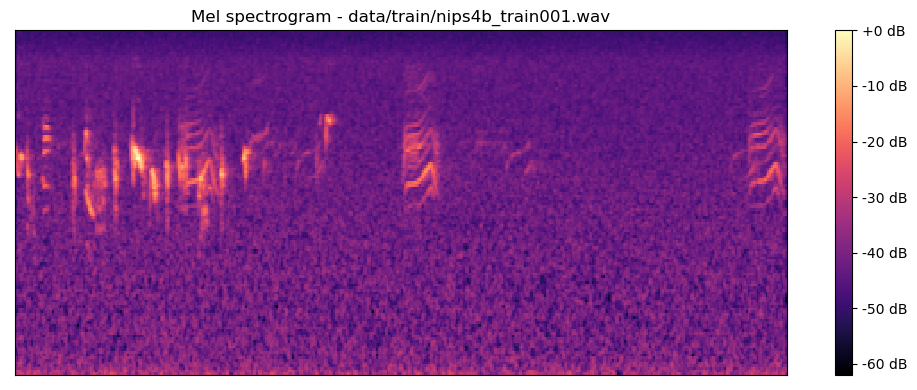

In [5]:
import numpy as np

def extract_spectrogram(file_path, n_mels=128):
    y, sr = librosa.load(file_path, sr=None)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    log_S = librosa.power_to_db(S, ref=np.max)
    return log_S, sr

train_files = [
    'data/train/nips4b_train001.wav',
    'data/train/nips4b_train002.wav',
    'data/train/nips4b_train003.wav'
]

spectrograms = {}
sample_rates = {}

for file in train_files:
    spectrograms[file], sample_rates[file] = extract_spectrogram(file)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[train_files[0]], sr=sample_rates[train_files[0]])
plt.colorbar(format='%+02.0f dB')
plt.title('Mel spectrogram - ' + train_files[0])
plt.tight_layout()
plt.show()

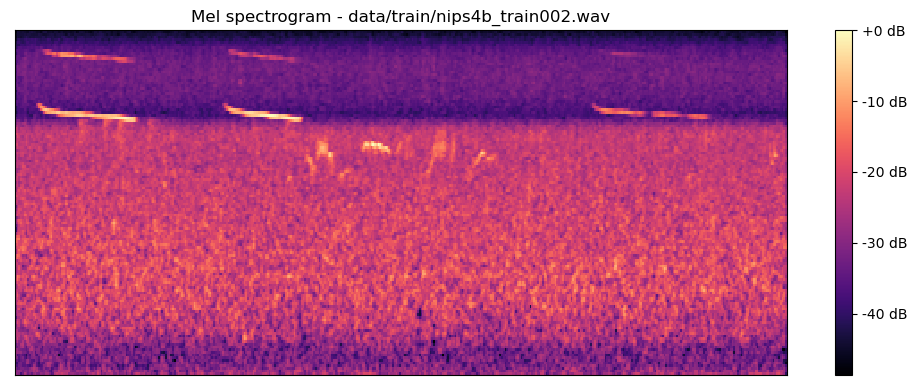

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[train_files[1]], sr=sample_rates[train_files[1]])
plt.colorbar(format='%+02.0f dB')
plt.title('Mel spectrogram - ' + train_files[1])
plt.tight_layout()
plt.show()

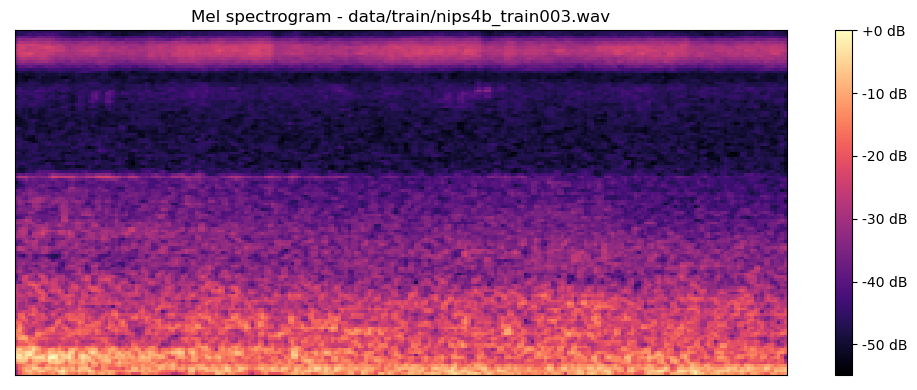

In [7]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrograms[train_files[2]], sr=sample_rates[train_files[2]])
plt.colorbar(format='%+02.0f dB')
plt.title('Mel spectrogram - ' + train_files[2])
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd


train_df = pd.read_csv('data/train.csv')
train_df['duration'] = train_df['end'] - train_df['start']

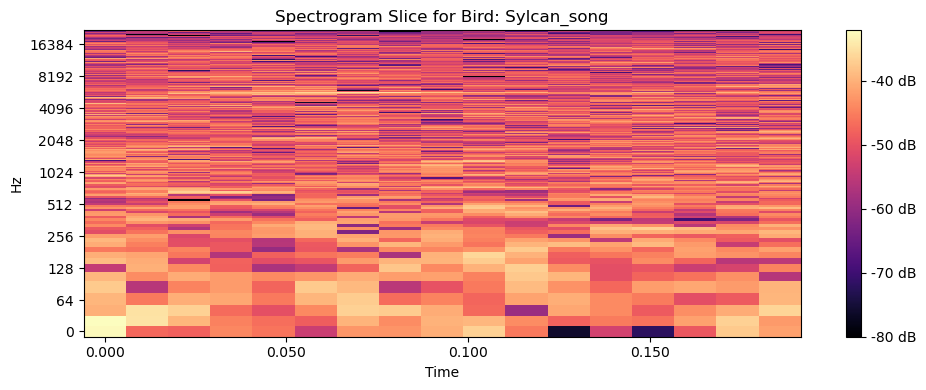

In [9]:

# Load one of the training audio files
audio_file_path = 'data/train/nips4b_train001.wav'
y, sr = librosa.load(audio_file_path, sr=None)  # y: audio time series, sr: sampling rate

# Compute the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Extract slices from the spectrogram based on labeled segments
slices = []
for index, row in train_df[train_df['filename'] == 'nips4b_train001.wav'].iterrows():
    start_time = row['start']
    end_time = row['end']
    start_sample = librosa.time_to_frames(start_time, sr=sr)
    end_sample = librosa.time_to_frames(end_time, sr=sr)
    slice_ = D[:, start_sample:end_sample]
    slices.append(slice_)

# Visualize one of the slices
plt.figure(figsize=(10, 4))
librosa.display.specshow(slices[0], sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram Slice for Bird: {train_df.loc[index, "class"]}')
plt.tight_layout()
plt.show()
